In [1]:
import pandas as pd #import needed libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read file
df=pd.read_csv('E:\shear lag in bolt angle data (2).csv',header=0)
df

,specimen s stands for single angle connected and d for double angle,Section size(mm),Type of section,connected leg(mm),Unconnected leg (length in mm),Connected leg thickness(mm),Unconnected leg thickness,Number of pitches,Number of guages,pitch distance(mm),Gauge distance,Edge distance of bolt (along load direction)(mm),Edge distance of bolt (perpendicular to load direction),number of bolts,Diameter of bolt hole,Yeild stress(mpa),Ultimate stress,ultimate load kN,"failure mode 0 = net, 1= block"
0,s1,102x102x6.4,S,102.00,102.0,6.40,6.40,5,NaN,76.00,63.50,38.00,38.00,6,24.00,300.00,450.00,512.8,1
1,s2,102x102x6.4,S,102.00,102.0,6.40,6.40,5,NaN,76.00,63.50,38.00,38.00,6,24.00,300.00,450.00,520.8,1
2,s3,102x102x6.4,S,102.00,102.0,6.40,6.40,5,NaN,76.00,63.50,38.00,38.00,6,24.00,300.00,450.00,487.1,1
3,s4,76x76x4.8,S,76.00,76.0,4.80,4.80,5,NaN,76.00,44.50,38.00,38.00,6,24.00,300.00,450.00,276.9,1
4,s5,102x102x6.4,S,102.00,102.0,6.40,6.40,5,NaN,76.00,63.50,38.00,38.00,6,24.00,300.00,450.00,446.4,1
5,s6,102x102x6.4,S,102.00,102.0,6.40,6.40,5,NaN,76.00,44.50,38.00,38.00,6,24.00,300.00,450.00,404.9,1
6,s7,102x102x6.4,S,102.00,102.0,6.40,6.40,5,NaN,76.00,63.50,38.00,38.00,6,24.00,300.00,450.00,432.9,1
7,s8,76x54x9.5,S,76.00,54.0,9.50,9.50,5,NaN,76.00,44.50,38.00,38.00,6,24.00,300.00,450.00,415.2,1
8,s9,76x76x4.8,S,76.00,76.0,4.80,4.80,5,NaN,76.00,44.50,38.00,38.00,6,24.00,300.00,450.00,233.5,1
9,s10,76x76x4.8,S,76.00,76.0,4.80,4.80,3,NaN,76.00,44.50,38.00,38.00,4,24.00,300.00,450.00,239.6,1


In [3]:
#delete unneccasary coluns
del df['specimen s stands for single angle connected and d for double angle']

In [4]:
del df['Section size(mm)']

In [5]:
del df['ultimate load kN']

In [6]:
del df['Number of guages']

In [3]:
df.info() #null values in gauges and ultiate load and  Type of section of section has categorical values we need to input then

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
specimen s stands for single angle connected and d for double angle    47 non-null object
Section size(mm)                                                       54 non-null object
Type of section                                                        60 non-null object
connected leg(mm)                                                      60 non-null float64
Unconnected leg (length in mm)                                         60 non-null float64
Connected leg thickness                                                60 non-null float64
Unconnected leg thickness                                              60 non-null float64
Number of pitches                                                      60 non-null int64
Number of guages                                                       20 non-null float64
pitch distance                                                         60 non-null 

In [4]:
df.shape #60 data points and 19 features

(60, 19)

In [5]:
df['Type of section'].unique() #4 categorical variables single and double angle t and w section

array(['S ', 'D ', 'T', 'W'], dtype=object)

In [6]:
print(df.groupby('failure mode 0 = net, 1= block').size()) #24 posities and 36 negetives

failure mode 0 = net, 1= block
0    24
1    36
dtype: int64


In [7]:
print(df.groupby('Type of section').size()) #more d , s and t sections in data

Type of section
D     13
S     27
T     15
W      5
dtype: int64


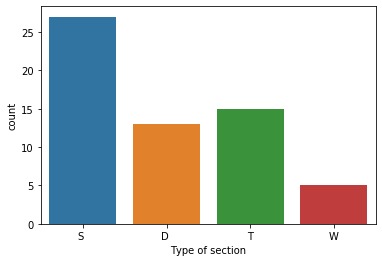

In [8]:
sns.countplot(x='Type of section',data=df)

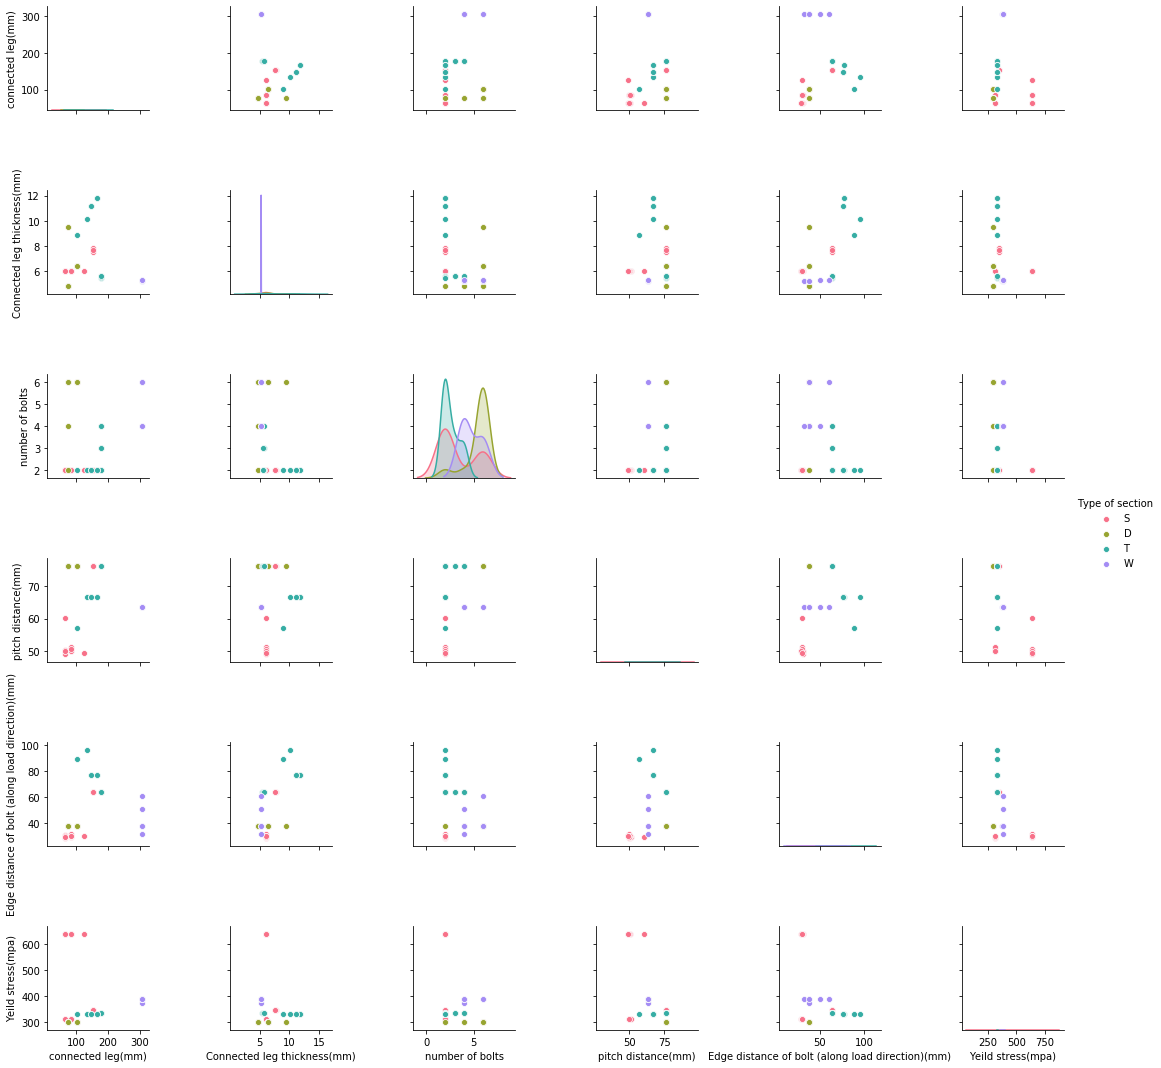

In [8]:
import seaborn as sns

df1=['Type of section','connected leg(mm)','Connected leg thickness(mm)','number of bolts','pitch distance(mm)','Edge distance of bolt (along load direction)(mm)','Yeild stress(mpa)']
data_plot_data=data_mod_num = df[df1]
sns.pairplot(data_plot_data, hue='Type of section', palette="husl")


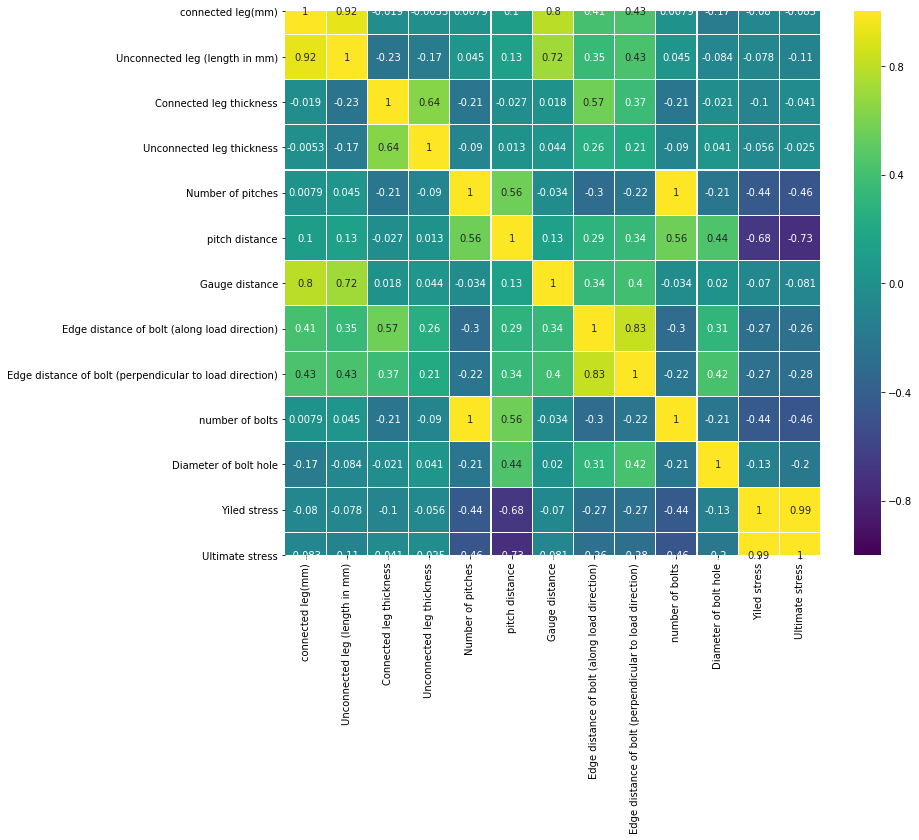

In [226]:
corr=df.drop('failure mode 0 = net, 1= block',axis=1).corr() # we have some coreletions abouve 0.9
plt.figure(figsize=(12, 10))
sns.heatmap(corr,cmap='viridis',vmax=1,vmin=-1,linewidth=0.1,annot=True)

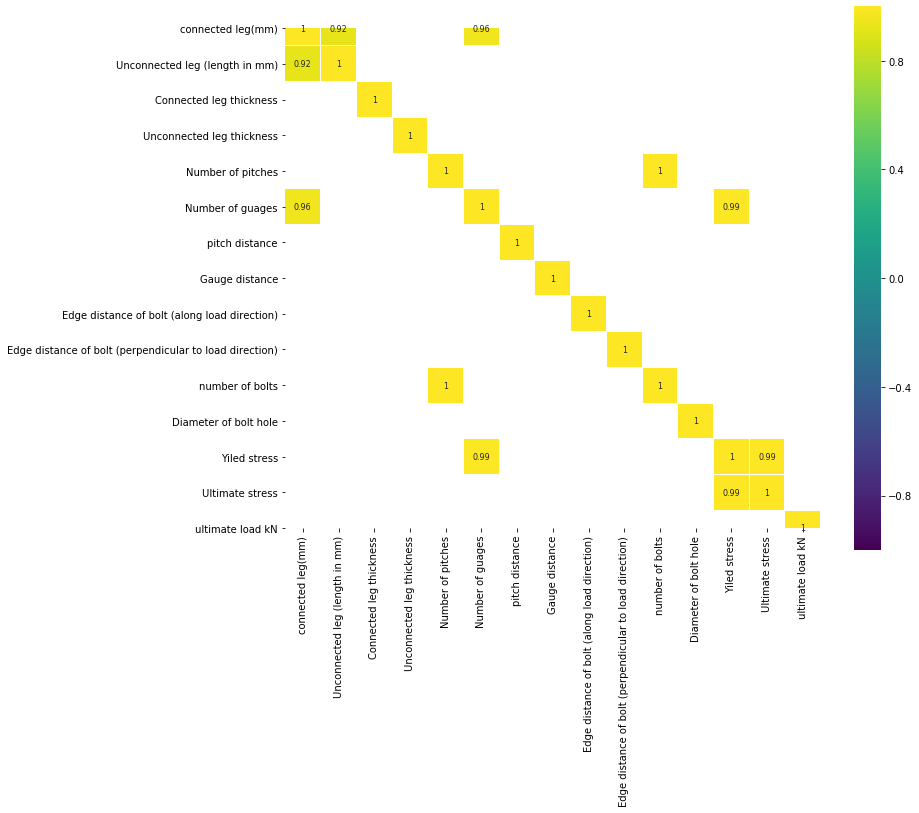

In [7]:
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True); #connected length and uncnnected lenght has very high corr so we delete one also yield stress and ultimate stress has high corr so we delte one

In [206]:
del df['Ultimate stress'] #delete corelted vlaues

In [207]:
del df['Number of pitches']

In [193]:
df=pd.get_dummies(data=df,columns=['Type of section']) # get nuerical value for categorical variables


In [7]:
df.describe()

,connected leg(mm),Unconnected leg (length in mm),Connected leg thickness(mm),Unconnected leg thickness,Number of pitches,pitch distance(mm),Gauge distance,Edge distance of bolt (along load direction)(mm),Edge distance of bolt (perpendicular to load direction),number of bolts,Diameter of bolt hole,Yeild stress(mpa),Ultimate stress,"failure mode 0 = net, 1= block"
count,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000
mean,127.58250,133.340000,6.493333,6.317167,2.783333,68.461667,67.973333,46.260000,46.340833,3.783333,24.1780,363.998667,501.392667,0.400000
std,65.88467,90.811168,1.761181,2.231478,1.823497,10.471818,30.050623,17.155043,18.611167,1.823497,1.7335,111.927999,87.321215,0.494032
min,65.00000,51.000000,4.800000,4.800000,1.000000,49.000000,12.000000,28.600000,26.400000,2.000000,20.6000,300.000000,450.000000,0.000000
25%,76.00000,76.000000,5.527500,5.527500,1.000000,63.500000,44.500000,38.000000,38.000000,2.000000,23.8000,300.000000,450.000000,0.000000
50%,102.00000,102.000000,6.000000,6.000000,2.500000,76.000000,63.500000,38.000000,38.000000,3.500000,24.0000,332.320000,463.000000,0.000000
75%,166.00000,137.525000,6.400000,6.400000,5.000000,76.000000,88.900000,63.500000,61.625000,6.000000,24.0000,346.000000,493.660000,1.000000
max,304.80000,355.600000,11.810000,21.700000,5.000000,76.200000,152.400000,96.150000,89.350000,6.000000,27.0000,640.000000,715.000000,1.000000


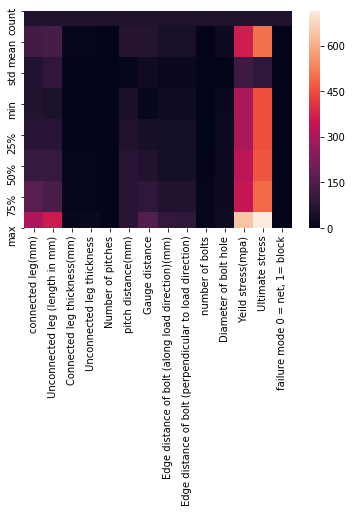

In [8]:
sns.heatmap(df.describe())

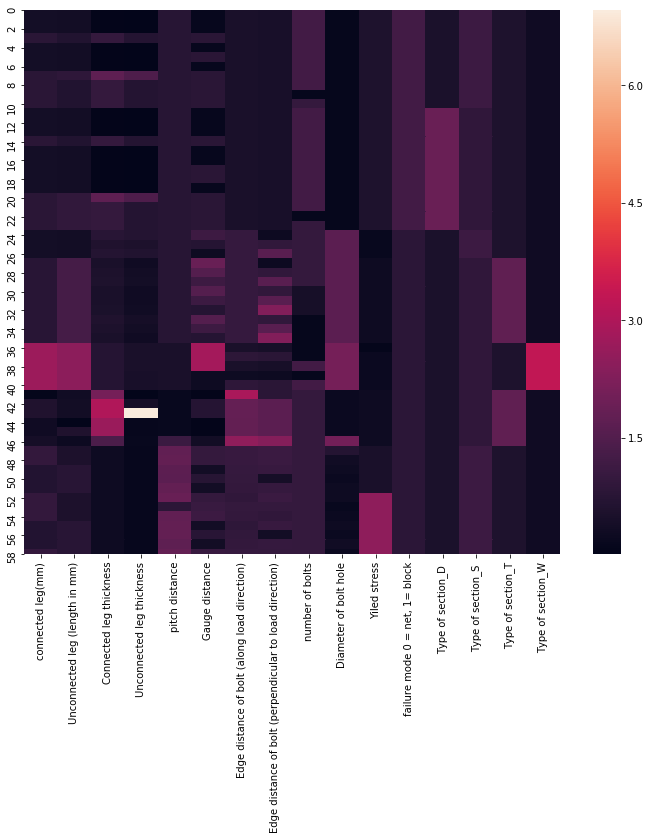

In [33]:
from scipy import stats
plt.figure(figsize=(12, 10))
z_value  = abs(df.apply(stats.zscore))
sns.heatmap(z_value) #get the z scores matrix




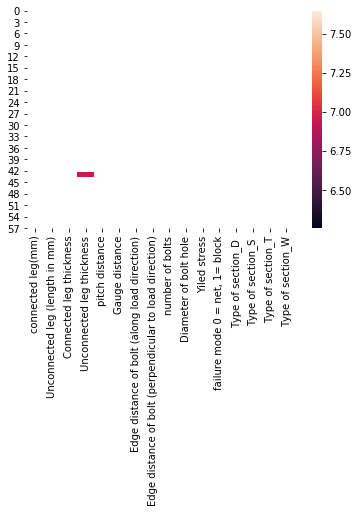

In [37]:
sns.heatmap(z_value[(z_value >= 3.5) ]) 


In [36]:
from scipy import stats
z=np.abs(stats.zscore(df))
threshold=3 #outlier treatement using z score
print(np.where(z>3.5))

(array([43], dtype=int32), array([3], dtype=int32))


In [81]:
#we find outliers in unconnected leg thickness 

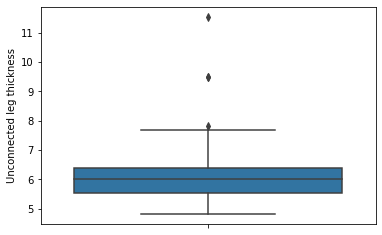

In [49]:
#plot the box plot of unnconnected leg to look for outliers
sns.boxplot(y='Unconnected leg thickness',data=df) #outliers in unconnected leg colu

Text(0.5, 0, 'Unconnected leg thickness')

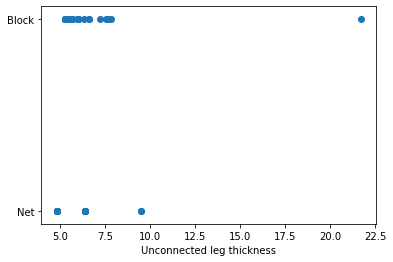

In [233]:
plt.scatter(df['Unconnected leg thickness'],df['failure mode 0 = net, 1= block'])
plt.xlabel('Unconnected leg thickness')

In [42]:
uv=np.percentile(df['Unconnected leg thickness'],[99])[0] #calculate 99 percentile
df[(df['Unconnected leg thickness']>uv)] #values which are higher than 99 percentile

,connected leg(mm),Unconnected leg (length in mm),Connected leg thickness,Unconnected leg thickness,pitch distance,Gauge distance,Edge distance of bolt (along load direction),Edge distance of bolt (perpendicular to load direction),number of bolts,Diameter of bolt hole,Yiled stress,"failure mode 0 = net, 1= block",Type of section_D,Type of section_S,Type of section_T,Type of section_W
43,166.0,102.3,11.81,21.7,66.67,88.9,77.1,77.1,2,23.81,332.32,1,0,0,1,0


In [45]:
df['Unconnected leg thickness'][df['Unconnected leg thickness']>uv]=uv # replace that value with 99percentile

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [209]:
X=df.loc[:,df.columns!='failure mode 0 = net, 1= block'] # varible x is all colun leaving the failure node
y=df['failure mode 0 = net, 1= block']  #failure ode is our y varible which hneed to be predicted

In [211]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) #divide 20% data set for testing and 80% for trainig

#from sklearn.preprocessing import MinMaxScaler # there are sone values which are high and sone very low so to scale the values we use MinMaxScaler
#mms=MinMaxScaler()
#X_train=mms.fit_transform(X_train)
#X_test=mms.transform(X_test)

In [212]:
# now we are done with data exploration and ready to apply our stastical odal 


In [213]:
#naive bayes classifier

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('train accuracy:{}'.format(gnb.score(X_train,y_train)))


print('test accuracy:{}'.format(gnb.score(X_test,y_test)))


train accuracy:1.0
test accuracy:1.0


In [232]:
np.array(y_train)


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [233]:
np.array(y_test)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [240]:
y_pred_train = knn.predict(X_train)
y_pred_train

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [239]:
y_pred_test = knn.predict(X_test)
y_pred_test 

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [236]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
confusion_matrix

array([[24,  0],
       [ 0, 18]], dtype=int64)

In [237]:
y_pred_test = gnb.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [238]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_test)
confusion_matrix

array([[12,  0],
       [ 0,  6]], dtype=int64)

In [221]:

#knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 1.00


In [222]:
y_pred_train = knn.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
confusion_matrix

array([[23,  1],
       [ 0, 18]], dtype=int64)

In [224]:
#logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
print('the accuract of train is{}'.format(lr.score(X_train,y_train)))
print('accuracy of test is {}'.format(lr.score(X_test,y_test)))

print(lr.coef_)


the accuract of train is1.0
accuracy of test is 1.0
[[-7.75499128e-02 -3.00234871e-03  5.62903381e-03  6.83816185e-03
   5.44444742e-01 -2.99817463e-03 -1.12959059e-01 -2.97817174e-02
   1.19086491e-01  2.33873954e-02 -7.65128650e-02  1.84693050e-02
  -1.30681436e-02 -3.24944580e-03 -9.68670868e-06]]


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [225]:
#svm

from sklearn.svm import SVC
svr = SVC(kernel='linear', C=1, random_state=0)
svr.fit(X_train,y_train)

print('the accuracy of train is:{:.2f}'.format(svr.score(X_train,y_train)))
print('the accuracy of test is:{:.2f}'.format(svr.score(X_train,y_train)))


the accuracy of train is:1.00
the accuracy of test is:1.00


In [226]:
#decision tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [227]:
#random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RF = RandomForestClassifier(n_estimators=200,  random_state=0)
RF.fit(X_train, y_train)
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 1.00


In [228]:
#calulating feature iportances
importance = RF.feature_importances_

In [229]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03769
Feature: 1, Score: 0.02763
Feature: 2, Score: 0.02843
Feature: 3, Score: 0.01226
Feature: 4, Score: 0.13443
Feature: 5, Score: 0.02611
Feature: 6, Score: 0.05796
Feature: 7, Score: 0.08137
Feature: 8, Score: 0.10732
Feature: 9, Score: 0.13317
Feature: 10, Score: 0.26583
Feature: 11, Score: 0.07050
Feature: 12, Score: 0.00296
Feature: 13, Score: 0.01063
Feature: 14, Score: 0.00371


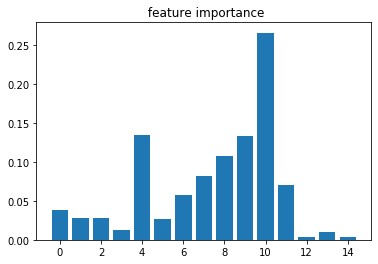

In [230]:
plt.title(' feature importance')
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [218]:
col=np.array(df.columns)
col

array(['connected leg(mm)', 'Unconnected leg (length in mm)',
       'Connected leg thickness', 'Unconnected leg thickness',
       'pitch distance', 'Gauge distance',
       'Edge distance of bolt (along load direction)',
       'Edge distance of bolt (perpendicular to load direction)',
       'number of bolts', 'Diameter of bolt hole', 'Yiled stress',
       'failure mode 0 = net, 1= block', 'Type of section_D ',
       'Type of section_S ', 'Type of section_T', 'Type of section_W'],
      dtype=object)